In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import comb

In [34]:
def maxwellsDemon(q, N=100, N_TIME_STEPS=10**3):
    if(q < 0 or q > 1):
        raise ValueError("q must be between 0 and 1 inclusive!")

    N_FAST = int(q * N)
    N_SLOW = int(N - N_FAST)

    try:
        Xk = np.random.randint(0, N_FAST)
    except ValueError:
        Xk = 0
    
    try:
        Yk = np.random.randint(0, N_SLOW)
    except ValueError:
        Yk = 0

    entropyList = list()

    for k in range(N_TIME_STEPS):
        event = np.random.choice(["Xk-1", "Xk+1", "Yk-1", "Yk"], p=[Xk/N, (q*N - Xk)/N, Yk/N, ((1-q)*N - Yk)/N])

        if event == "Xk-1":
            Xk -= 1
        elif event == "Xk+1":
            Xk += 1
        elif event == "Yk-1":
            Yk -= 1
        else:
            Yk += 0
        
        Sk = np.log(float((comb(N_FAST, Xk)))) + np.log(float((comb(N_SLOW, Yk))))

        entropyList.append(Sk)

    return(entropyList)

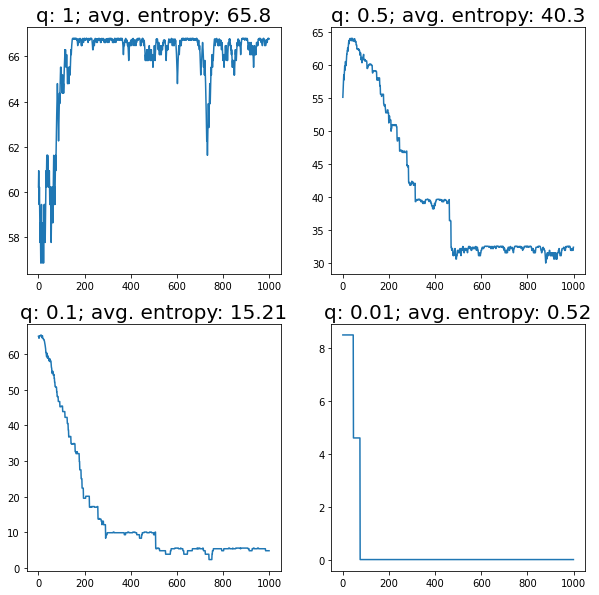

In [40]:
figure, axes = plt.subplots(2, 2, figsize=(10, 10))

qChoices = [1, 0.5, 0.1, 0.01]

for i, ax in enumerate(axes.flatten()):
    entropyList = maxwellsDemon(q=qChoices[i])

    meanEntropy = round(np.array(entropyList).mean(), 2)
    
    ax.plot(range(0, 1000), entropyList)
    ax.set_title(label="q: " + str(qChoices[i]) + "; avg. entropy: " + str(meanEntropy), size=20)

For q=1 (all fast particles) entropy increases over time and reaches some stable high value. This makes sense because no particles are being trapped and we would expect a gradual increase in disorder, with half the particles in one urn and half in the other. As we decrease q and increase the number of slow particles, we see that entropy decreases over time and reaches a much smaller value. This makes sense because the particles are becoming organized in the right urn and the left urn gradually experiences more emptiness.